# NOAA GFS on AWS

 * [OpenData Registry](https://registry.opendata.aws/noaa-gfs-pds/)
 * [Browse datafiles](http://awsopendata.s3-website-us-west-2.amazonaws.com/noaa-gfs/#)

In [1]:
# imports and setup

from matplotlib import pyplot
from podpac.coordinates import Coordinates, clinspace, crange
from podpac.datalib.gfs import GFSSource, GFS, GFSLatest

import datetime
now = datetime.datetime.now()
yesterday = now - datetime.timedelta(1)
tomorrow = now + datetime.timedelta(1)

# The data files are removed after a few weeks. Normally that won't matter
# because you would probably use GFSLatest. In order to demo GFSSource and GFS,
# let's use yesterday 12:00 as the base date.
date = yesterday.strftime('%Y%m%d')
hour = '1200'

D:\podpac-1.2.0\miniconda\envs\podpac\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


## GFSSource

Load and plot a forecast for a particular parameter and level. This node loads data from one S3 file given a parameter, level, base date, and forecast time.

INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191104/1200/003)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/10-40 m DPTH/20191104/1200/384)


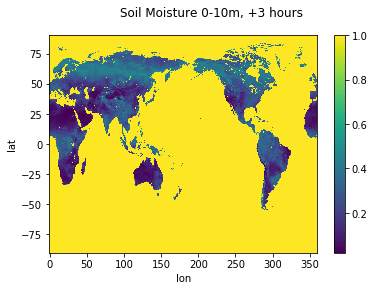

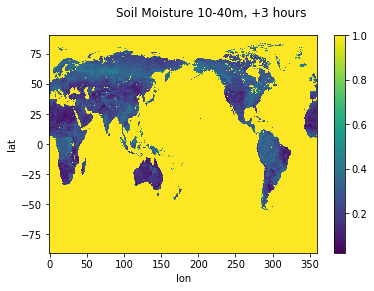

In [2]:
# SOIM forecast from 2018-12-06 12:00 for +3 hours (2018-12-06 15:00)
gfs_soim = GFSSource(parameter='SOIM', level='0-10 m DPTH', date=date, hour=hour, forecast='003')
o = gfs_soim.eval(gfs_soim.native_coordinates)
pyplot.figure(); pyplot.suptitle('Soil Moisture 0-10m, +3 hours')
o.plot()

# SOIM forecast from 2018-12-06 12:00 for +3 hours (2018-12-06 15:00)
gfs_soim = GFSSource(parameter='SOIM', level='10-40 m DPTH', date=date, hour=hour, forecast='384')
o = gfs_soim.eval(gfs_soim.native_coordinates)
pyplot.figure(); pyplot.suptitle('Soil Moisture 10-40m, +3 hours')
o.plot()
pass

INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: TOZO/0 - NONE/20191104/1200/003)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: TOZO/0 - NONE/20191104/1200/384)


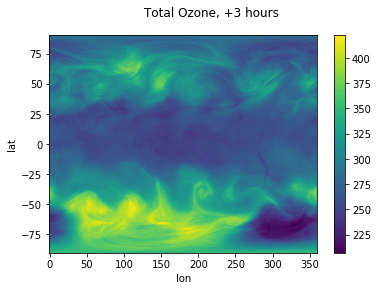

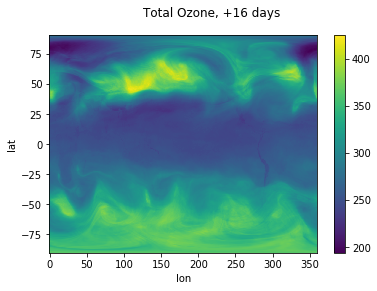

In [3]:
# TOZO forecast from 2018-12-06 12:00 for +3 hours (2018-12-22 15:00)
gfs_tozo = GFSSource(parameter='TOZO', level='0 - NONE', date=date, hour=hour, forecast='003')
o = gfs_tozo.eval(gfs_tozo.native_coordinates)
pyplot.figure(); pyplot.suptitle('Total Ozone, +3 hours')
o.plot()

# TOZO forecast from 2018-12-06 12:00 for +384 hours (2018-12-22 12:00)
gfs_tozo= GFSSource(parameter='TOZO', level='0 - NONE', date=date, hour=hour, forecast='384')
o = gfs_tozo.eval(gfs_tozo.native_coordinates)
pyplot.figure(); pyplot.suptitle('Total Ozone, +16 days')
o.plot()
pass

## GFS

The `GFS` node aggregates the `GFSSource` forecast nodes given a parameter, level, and base date. It interpolates forecast time, so you can get data for any time in the forecast range.

*Not yet complete*

INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191104/1200/036)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191104/1200/066)


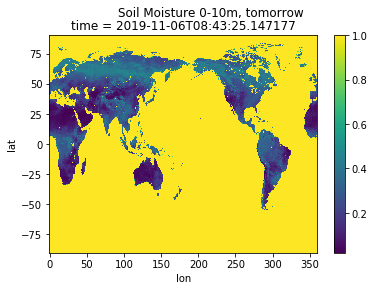

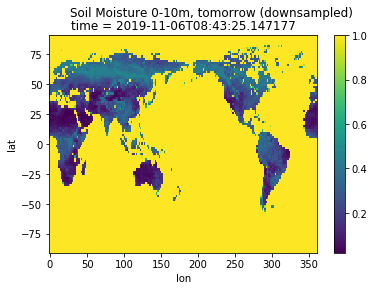

In [4]:
# we'll re-use the same node with different coordinates in the following examples
gfs_soim = GFS(parameter='SOIM', level='0-10 m DPTH', date=date, hour=hour)

# get the global forecast for this time tomorrow at full resolution
c = Coordinates(
    [gfs_soim.native_coordinates['lat'], gfs_soim.native_coordinates['lon'], tomorrow],
    dims=['lat', 'lon', 'time'])

o = gfs_soim.eval(c)
pyplot.figure(); pyplot.suptitle('Soil Moisture 0-10m, tomorrow')
o.plot()

# get the regional forecast for this time tomorrow over at downsampled resolution
c = Coordinates([
    clinspace(-90,  90, 100), clinspace(0, 360, 200), tomorrow],
    dims=['lat', 'lon', 'time'])

o = gfs_soim.eval(c)
pyplot.figure(); pyplot.suptitle('Soil Moisture 0-10m, tomorrow (downsampled)')
o.plot()
pass

### Time-series

The `GFS` node can also be used to plot the forecast for a particular location over time.

In [5]:
# this is the same node as above
gfs_soim = GFS(parameter='SOIM', level='0-10 m DPTH', date=date, hour=hour)

# get the forecast at lat=42, lon=275 every hour for the next 6 hours
start = now
stop = now + datetime.timedelta(hours=6)
c = Coordinates([42, 282, crange(start, stop, '1,h')], dims=['lat', 'lon', 'time'])
o = gfs_soim.eval(c)
print(o)
# o.plot()

INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191104/1200/018)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191104/1200/021)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191104/1200/024)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191104/1200/027)


<xarray.UnitsDataArray (lat: 1, lon: 1, time: 7)>
array([[[0.3  , 0.3  , 0.308, 0.308, 0.308, 0.316, 0.316]]])
Coordinates:
  * lat      (lat) float64 42.0
  * lon      (lon) float64 282.0
  * time     (time) datetime64[ns] 2019-11-05T08:43:25.147177 ... 2019-11-05T14:43:25.147177
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x000001A025850710>
    crs:          EPSG:4326


## GFSLatest

Convenience wrapper to get the most recently available `GFS` node. Just supply the parameter and level, and evaluate at any time up to 16 days from now.

*Not yet complete*

In [6]:
# get the latest forecast at lat=42, lon=275 at 1 hour resolution

gfs_soim = GFSLatest(parameter='SOIM', level='0-10 m DPTH')
start = now + datetime.timedelta(hours=3)
stop = now + datetime.timedelta(hours=9)
c = Coordinates([42, 282, crange(start, stop, '1,h')], dims=['lat', 'lon', 'time'])

o = gfs_soim.eval(c)
print(o)
# o.plot()

INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191105/0600/003)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191105/0600/006)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191105/0600/009)
INFO:podpac.datalib.gfs:Downloading S3 fileobj (Bucket: noaa-gfs-pds, Key: SOIM/0-10 m DPTH/20191105/0600/012)


<xarray.UnitsDataArray (lat: 1, lon: 1, time: 7)>
array([[[0.301, 0.301, 0.307, 0.307, 0.307, 0.305, 0.305]]])
Coordinates:
  * lat      (lat) float64 42.0
  * lon      (lon) float64 282.0
  * time     (time) datetime64[ns] 2019-11-05T11:43:25.147177 ... 2019-11-05T17:43:25.147177
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x000001A02588F2E8>
    crs:          EPSG:4326
